# Simulating the effect of pixelization errors on Gaussian fittings

## Importing packages

In [3]:
import os
import sys
sys.path.append('./')

import math
import numpy as np
from numpy import size
from scipy.optimize import curve_fit
from astropy.table import Table, Column
from astropy.io import fits
from spectral_cube import SpectralCube
#import astropy.units as u


import matplotlib
#matplotlib.use('PDF')
import matplotlib.pyplot as plt
%matplotlib inline

## Plotting results

In [35]:
f1 = 'fitted_h13copfits_results_snr5_Apr9_refit_somepixels_flaged.fits'
f2 = 'imfit_densecore_id.fits'
f3 = 'IRDC_G350_H13COP_JUNE27_cubemask_niters1e4_thresh12_multi072142.image.fits'
f4 = 'map_compidex.fits'

hdu1 = fits.open(f1)
hdu2 = fits.open(f2)
hdu3 = fits.open(f3)
hdu4 = fits.open(f4)

data1 = hdu1[0].data
data2 = hdu2[0].data[0]
data3 = hdu3[0].data
hdr3  = hdu3[0].header
data4 = hdu4[0].data

print data1.shape, data2.shape



(24, 1536, 1024) (1536, 1024)


---

### Plotting the spectral for all of dense cores that have H13CO+ detection.
---

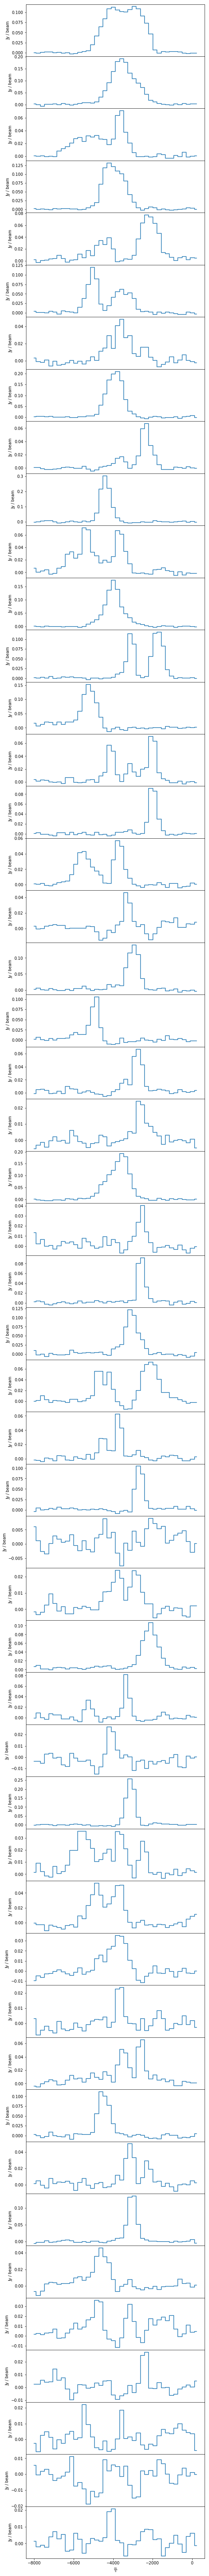

In [38]:
fig = plt.figure(figsize=(8,120))
plt.subplots_adjust(hspace=0.0)

for i in range(size(T)):
    #print np.nanmean(Adata1)*1.0/np.nanmean(Adata1_err)
    #print i
    k = i + 1
    cube    = np.where( data2 == i, data3, np.nan )
    HDU     = fits.PrimaryHDU( data=cube, header=hdr3 )
    HDUList = fits.HDUList( [HDU] )
    cube    = SpectralCube.read( HDUList )
    sp      = cube.mean( axis=(1,2) )
    
    ax      = plt.subplot(size(T)+1,1,k)
    sp.quicklook()

In [ ]:
fig = plt.figure(figsize=(8,64))
plt.subplots_adjust(hspace=0.0)